# SMS Spam Classification Using NLP

Step 1 - Reading Data Visualization

### Import Modules

In [ ]:
import pandas as pd
import nltk

### Read Dataset

In [ ]:
df = pd.read_csv("spam.csv", encoding = "latin-1")

FileNotFoundError: [Errno 2] No such file or directory: 'spam.csv'

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [ ]:
df.rename(columns={'v1':'class', 'v2': 'sms'}, inplace = True)
df.sample(5)

,class,sms
2154,ham,Oh god i am happy to see your message after 3 ...
3094,ham,Olol i printed out a forum post by a guy with ...
5406,ham,Dear are you angry i was busy dear
3891,spam,URGENT This is our 2nd attempt to contact U. Y...
3270,spam,You have 1 new voicemail. Please call 08719181...


In [ ]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.groupby('class').describe()

Length                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0
spam    653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0

### Data Visualization

In [ ]:
df['Length'] = df['sms'].apply(len)

In [ ]:
df.head(2)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

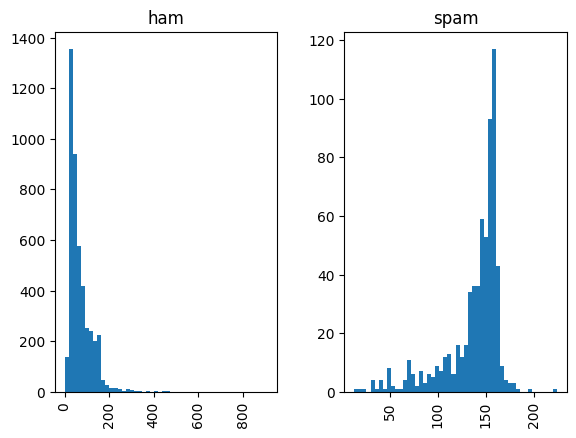

In [ ]:
df.hist(column='Length', by = 'class', bins = 50)

Step 2 - Preprocessing

In [ ]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head(5)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessing Tasks

*   Lower Case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming

In [ ]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
df['sms_cleaned'] = df['sms'].apply(clean_text)

In [ ]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


# Step 3 - Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_vec = TfidfVectorizer(max_features=3000)
X = tf_vec.fit_transform(df['sms_cleaned']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
Y = df['class'].values

# Step 4 - Training

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

# Give Test Data

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9709864603481625
